dily challenge

In [2]:
import pandas as pd
import numpy as np

In [5]:
import pandas as pd
import numpy as np

file_path = "global.csv"  # Nom du fichier sous forme de chaîne
df = pd.read_csv(file_path)  # Utilisation correcte

print(df.head())
print(df.info())


FileNotFoundError: [Errno 2] No such file or directory: 'global.csv'

In [6]:
import pandas as pd
import numpy as np


file_path = "/Users/Nicolas/Desktop/Bootcamp_GenAi_Fev2025/Week_3/Day2/global.csv"


df = pd.read_csv(file_path)


print(df.head())
print(df.info())


  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...    

/var/folders/4x/y19tv9t12q123fdsq8qvdq_c0000gn/T/ipykernel_26668/784628952.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [7]:

print("Valeurs manquantes par colonne :")
print(df.isnull().sum())


df['capacity_mw'].fillna(df['capacity_mw'].median(), inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].median(), inplace=True)


df['primary_fuel'].fillna("Unknown", inplace=True)


df_cleaned = df.dropna(subset=['latitude', 'longitude'])

print("Données nettoyées !")


Valeurs manquantes par colonne :
country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generat

In [8]:

print(df_cleaned.describe())


print(df_cleaned['country_long'].value_counts().head(10))


print(df_cleaned['primary_fuel'].value_counts())


        capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        34936.000000   
mean     163.355148     32.816637     -6.972803         2002.213173   
std      489.636072     22.638603     78.405850           17.215166   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         2007.000000   
50%       16.745000     39.727750     -2.127100         2007.000000   
75%       75.344250     46.263125     49.502675         2007.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           14887.000000          6417.000000          7226.000000   
mean             2018.218849           592.696107           656.863891   
std                 1.606428          2174.833482          2231.464288   
min              2000.000000          -947.600000          -989.

In [9]:
from scipy.stats import ttest_ind


coal_plants = df_cleaned[df_cleaned['primary_fuel'] == 'Coal']['capacity_mw']
hydro_plants = df_cleaned[df_cleaned['primary_fuel'] == 'Hydro']['capacity_mw']

t_stat, p_value = ttest_ind(coal_plants, hydro_plants, nan_policy='omit')

print(f"T-Statistique: {t_stat:.3f}")
print(f"P-Value: {p_value:.5f}")

if p_value < 0.05:
    print("Les capacités sont significativement différentes entre le charbon et l’hydroélectrique.")
else:
    print("Aucune différence significative entre ces deux types d’énergie.")


T-Statistique: 44.956
P-Value: 0.00000
Les capacités sont significativement différentes entre le charbon et l’hydroélectrique.


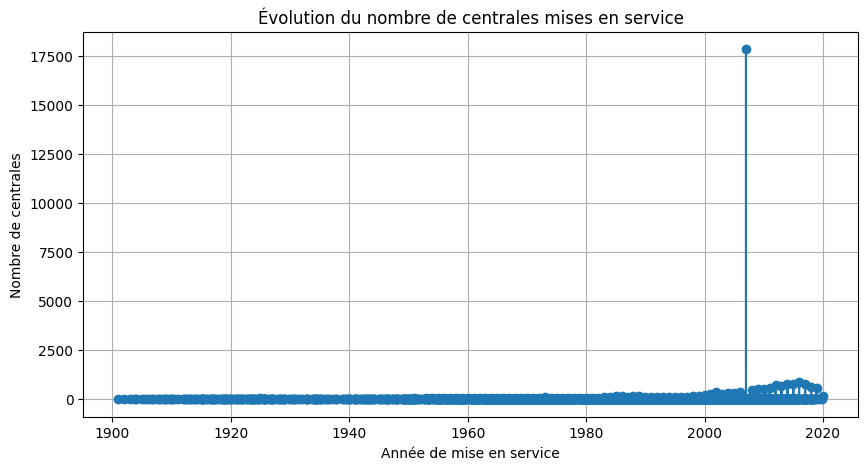

In [10]:
import matplotlib.pyplot as plt


df_year = df_cleaned.groupby('commissioning_year').size()
df_year = df_year[df_year.index > 1900]  


plt.figure(figsize=(10, 5))
plt.plot(df_year.index, df_year.values, marker='o', linestyle='-')
plt.xlabel("Année de mise en service")
plt.ylabel("Nombre de centrales")
plt.title("Évolution du nombre de centrales mises en service")
plt.grid()
plt.show()


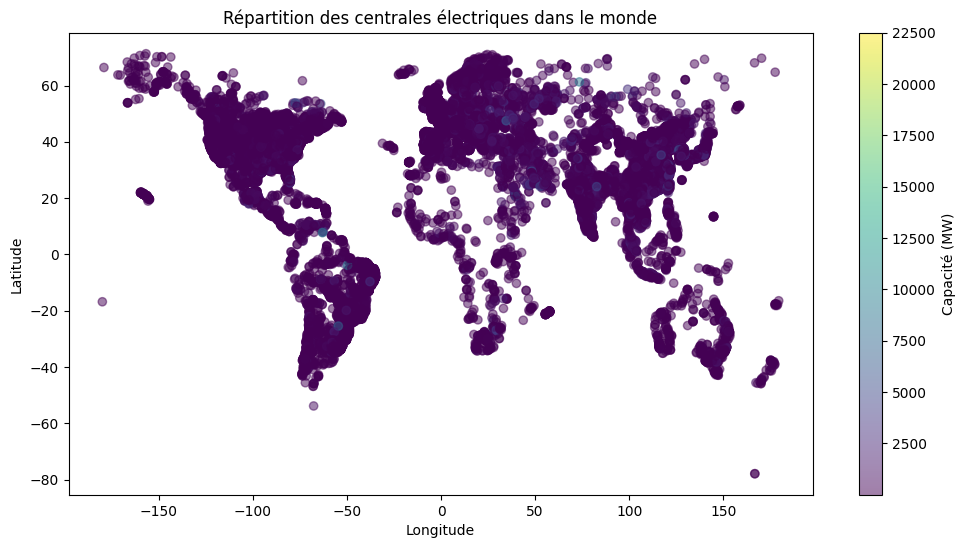

In [11]:
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned['longitude'], df_cleaned['latitude'], c=df_cleaned['capacity_mw'], cmap='viridis', alpha=0.5)
plt.colorbar(label="Capacité (MW)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Répartition des centrales électriques dans le monde")
plt.show()


In [12]:

matrix = df_cleaned[['capacity_mw', 'latitude', 'longitude']].dropna().to_numpy()


cov_matrix = np.cov(matrix.T)


eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Valeurs propres :\n", eigenvalues)
print("Vecteurs propres :\n", eigenvectors)


Valeurs propres :
 [239888.34493566   6005.22827679    509.89320204]
Vecteurs propres :
 [[ 9.99690263e-01 -2.48871486e-02  9.13937503e-05]
 [-6.24482185e-04 -2.14133001e-02  9.99770514e-01]
 [ 2.48794803e-02  9.99460905e-01  2.14222092e-02]]


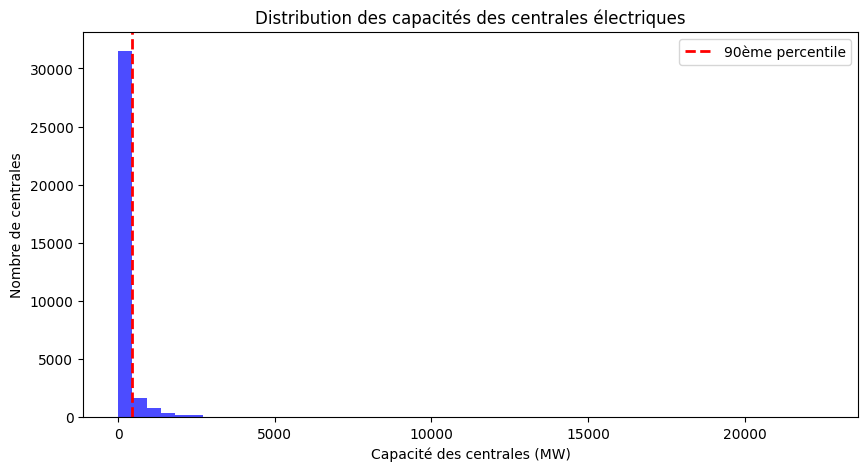

In [13]:

threshold = np.percentile(df_cleaned['capacity_mw'], 90)
high_capacity_plants = df_cleaned[df_cleaned['capacity_mw'] > threshold]


plt.figure(figsize=(10, 5))
plt.hist(df_cleaned['capacity_mw'], bins=50, color='blue', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label="90ème percentile")
plt.xlabel("Capacité des centrales (MW)")
plt.ylabel("Nombre de centrales")
plt.title("Distribution des capacités des centrales électriques")
plt.legend()
plt.show()
